# Price estimate for card 

https://www.makeplayingcards.com/design/custom-blank-card.html

In [1]:
def parse_price(s, lead=()):
    lines = s.strip().splitlines()
    data = []
    for l in lines:
        rg, p = l.split("\t$")

        min, max = rg.split("-")
        for q in range(int(min), int(max) + 1):
            data.append((*lead, rg, q, float(p)))
    return data

In [2]:
import pandas as pd

df = pd.DataFrame(
    parse_price(
        """1-5	$12.15
6-29	$9.30
30-49	$7.45
50-99	$6.40""",
        ("color", 36),
    )
    + parse_price(
        """1-5	$14.90
6-29	$11.60
30-49	$9.55
50-99	$7.95
""",
        ("color", 55),
    )
    + parse_price(
        """1-5	$18.00
6-29	$14.70
30-49	$11.15
50-99	$9.80""",
        ("color", 72),
    )
    + parse_price(
        """1-5	$122.50
6-29	$96.40
30-49	$72.30
50-99	$63.65
""",
        ("color", 612),
    )
    + parse_price(
        """1-5	$22.10
6-29	$17.60
30-49	$13.15
50-99	$11.55""",
        ("color", 90),
    )
    + parse_price(
        """1-5	$26.15
6-29	$20.50
30-49	$15.40
50-99	$13.65""",
        ("color", 108),
    )
    + parse_price(
        """1-5	$30.25
6-29	$23.15
30-49	$17.35""",
        ("color", 126),
    )
    + parse_price(
        """1-5	$9.00
6-29	$6.70
30-49	$5.50
50-99	$4.70
100-249	$3.75""",
        ("color", 18),
    )
    + parse_price(
        """1-5	$34.35
6-29	$25.85
30-49	$19.40""",
        ("color", 144),
    )+ parse_price("""1-5	$29.90
6-29	$24.40
30-49	$20.45
50-99	$14.55
100-249	$10.35""",
        ('holo', 55)
    )+ parse_price("""1-5	$27.15
6-29	$22.10
30-49	$18.35
50-99	$13.00""",
        ('holo', 36)
    )+ parse_price("""1-5	$24.00
6-29	$19.50
30-49	$16.40
50-99	$11.30
100-249	$7.75""",
    ('holo', 18)
    )+ parse_price("""1-5	$38.30
6-29	$32.00
30-49	$25.95
50-99	$18.80
100-249	$13.15""", ('holo', 72))
  
    
    ,columns=["type", "deck_size", "range", "n_decks", "price/deck"],
)

In [7]:
df["total_price"] = df.n_decks * df['price/deck']
df["n_cards"] = df.deck_size * df.n_decks
df["desc_deck"] = df.deck_size.apply(str)#+df.type
ndf = df[(df.n_cards < 3500)]

In [8]:
ndf

,type,deck_size,range,n_decks,price/deck,total_price,n_cards,desc_deck
0,color,36,1-5,1,12.15,12.15,36,36
1,color,36,1-5,2,12.15,24.30,72,36
2,color,36,1-5,3,12.15,36.45,108,36
3,color,36,1-5,4,12.15,48.60,144,36
4,color,36,1-5,5,12.15,60.75,180,36
...,...,...,...,...,...,...,...,...
1581,holo,72,30-49,44,25.95,1141.80,3168,72
1582,holo,72,30-49,45,25.95,1167.75,3240,72
1583,holo,72,30-49,46,25.95,1193.70,3312,72
1584,holo,72,30-49,47,25.95,1219.65,3384,72


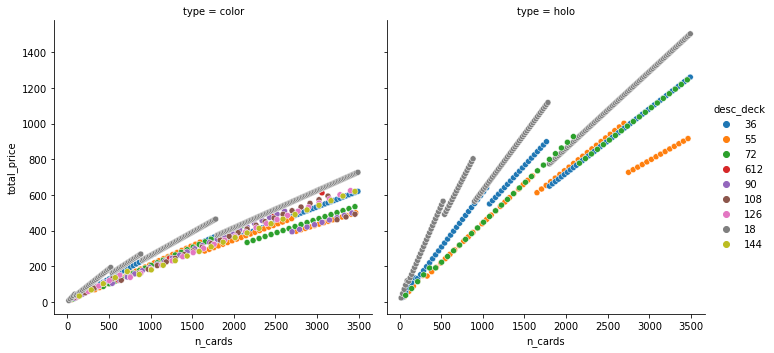

In [9]:
import seaborn


seaborn.relplot(
    data=ndf,
    x="n_cards",
    y="total_price",
    hue="desc_deck",
    col='type'
)

# prelim trim:

N=18 is never worth it
N=36 neither as it's a bit cheper only on large number of holo cards

In [10]:
ndf = ndf[(ndf.deck_size != 36)&
          (ndf.deck_size!= 18) &
         (ndf.deck_size!= 90) &
         (ndf.deck_size!= 108) &
         (ndf.deck_size!= 126)]

ndf = ndf.drop(ndf[(ndf.type == 'holo') & (ndf.n_cards > 1200)].index, axis=0)

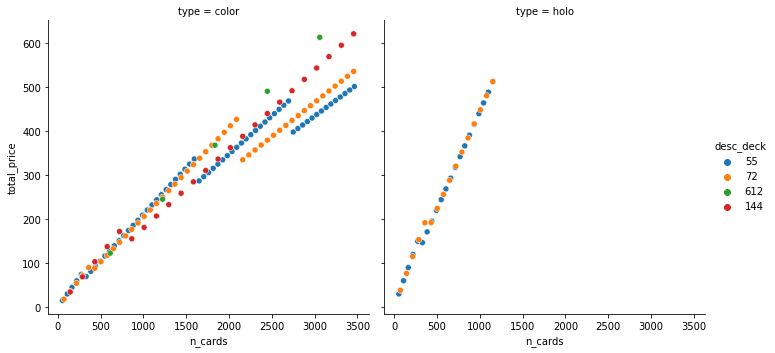

In [11]:
seaborn.relplot(
        data=ndf,
        x="n_cards",
        y="total_price",
        hue="desc_deck",
        col='type'
    )

suggestions:

1) if we want ~ 2/3 cards per attendees we need to order between 1400 and 2100 cards, 


In [12]:

ndf[(ndf.type == 'color') & (ndf.deck_size == 55) & (ndf.n_cards > 1400) & (ndf.n_cards < 2100)]

,type,deck_size,range,n_decks,price/deck,total_price,n_cards,desc_deck
124,color,55,6-29,26,11.60,301.60,1430,55
125,color,55,6-29,27,11.60,313.20,1485,55
126,color,55,6-29,28,11.60,324.80,1540,55
127,color,55,6-29,29,11.60,336.40,1595,55
128,color,55,30-49,30,9.55,286.50,1650,55
129,color,55,30-49,31,9.55,296.05,1705,55
130,color,55,30-49,32,9.55,305.60,1760,55
131,color,55,30-49,33,9.55,315.15,1815,55
132,color,55,30-49,34,9.55,324.70,1870,55
133,color,55,30-49,35,9.55,334.25,1925,55


In [13]:
ndf[(ndf.type == 'color') & (ndf.deck_size != 55) &(ndf['total_price'] > 330) & (ndf['total_price'] < 362)].sort_values('total_price')

,type,deck_size,range,n_decks,price/deck,total_price,n_cards,desc_deck
227,color,72,30-49,30,11.15,334.50,2160,72
904,color,144,6-29,13,25.85,336.05,1872,144
220,color,72,6-29,23,14.70,338.10,1656,72
228,color,72,30-49,31,11.15,345.65,2232,72
221,color,72,6-29,24,14.70,352.80,1728,72
229,color,72,30-49,32,11.15,356.80,2304,72
905,color,144,6-29,14,25.85,361.90,2016,144


Note the cut at spot, for $356 we get 2304 cards for decks of 72, while deck of 55 cards at 362 has less total cards (2090)

For holo card, the price is linear

In [14]:
ndf[(ndf.type == 'holo') & (ndf['total_price'] < 200)].sort_values('total_price')

,type,deck_size,range,n_decks,price/deck,total_price,n_cards,desc_deck
941,holo,55,1-5,1,29.9,29.9,55,55
1538,holo,72,1-5,1,38.3,38.3,72,72
942,holo,55,1-5,2,29.9,59.8,110,55
1539,holo,72,1-5,2,38.3,76.6,144,72
943,holo,55,1-5,3,29.9,89.7,165,55
1540,holo,72,1-5,3,38.3,114.9,216,72
944,holo,55,1-5,4,29.9,119.6,220,55
946,holo,55,6-29,6,24.4,146.4,330,55
945,holo,55,1-5,5,29.9,149.5,275,55
1541,holo,72,1-5,4,38.3,153.2,288,72


Proposal:

7 holo decks with 55 cards each = $170 (385 holo cards)
32 color decks with 72 cards each $356 (2304 color cards)

Total $526 + tax + shipping I guess?


